# Loading Audio file

In [2]:
import librosa

In [3]:
x,sr = librosa.load('Violin.wav')

In [4]:
print(type(x), type(sr))

<class 'numpy.ndarray'> <class 'int'>


In [6]:
print(x.shape)
print(sr)
#audio time series as numpy array returned with a default sampling rate of 22khz mono

(396688,)
22050


In [7]:
librosa.load('Violin.wav', sr=44100) #or sr=None to disable resampling

(array([-0.0022583 , -0.00314331, -0.003479  , ...,  0.00091553,
         0.00091553,  0.00091553], dtype=float32), 44100)

The sample rate is the number of samples of audio carried per second, measured in Hz or kHz.

# Playing the audio

In [8]:
import IPython.display as ipd
ipd.Audio('Violin.wav')

# Visualizing Audio

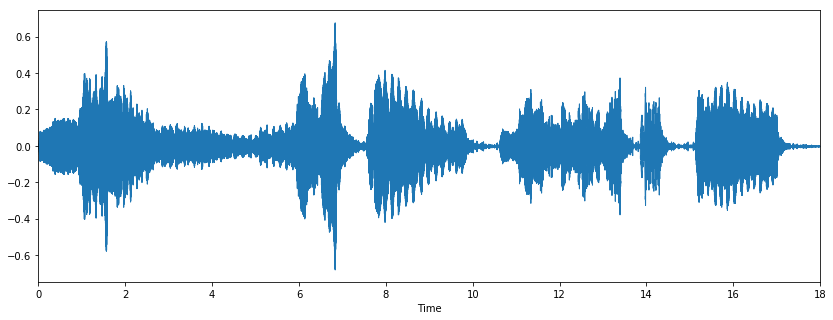

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
import librosa.display

plt.figure(figsize = (14,5))
librosa.display.waveplot(x, sr=sr)

# Spectrogram

Frequencies of signal as they vary with time

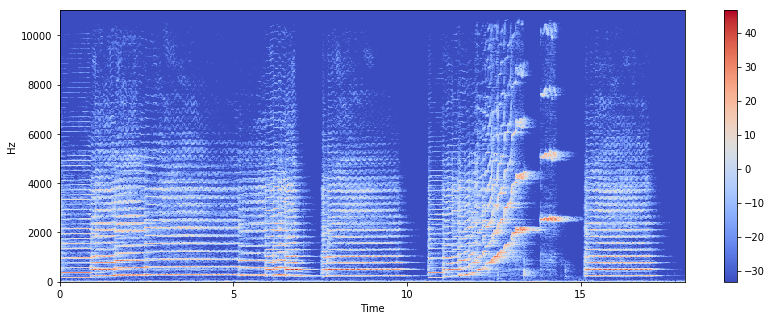

In [10]:
x = librosa.stft(x) #Short-time Fourier transform 
#abs of returned matrix gives magnitude of freq bin. Angle gives phase 

Xdb = librosa.amplitude_to_db(abs(x)) #Convert an amplitude spectrogram to dB-scaled spectrogram.

plt.figure(figsize=(14,5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar() #Add a colorbar to a plot.

Most peaks found at the bottom of the spectrogram. So the frequency axis is converted to aa logarithmic one.

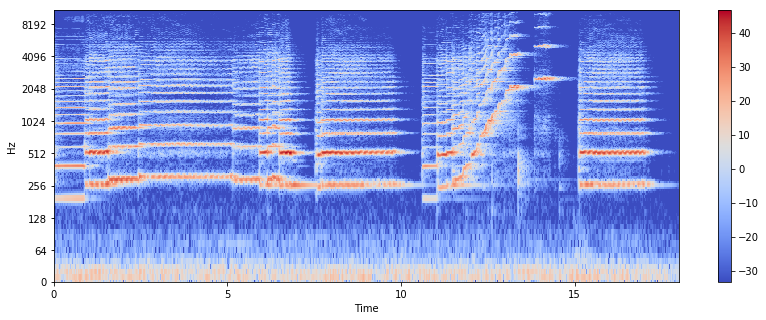

In [12]:
plt.figure(figsize=(14,5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
plt.colorbar()

# Creating an audio signal

In [9]:
librosa.output.write_wav('Example.wav', x, sr)

In [14]:
import numpy as np
sr = 22050
T = 5.0 #seconds
t = np.linspace(0, T, int(T*sr), endpoint=False)
x = 0.5*np.sin(2*np.pi * 220 * t) #pure sine wave at 220Hz


librosa.output.write_wav('tone_220.wav', x, sr)

In [15]:
ipd.Audio(x, rate=sr)

# Feature extraction

##### 1) Zero crossing rate
- rate of sign changes along a signal.
- used in speech recognition and MIR.
- higher values for higher percussive sounds (metal/rock).

In [16]:
x, sr = librosa.load('Violin.wav')
ipd.Audio(x, rate=sr)

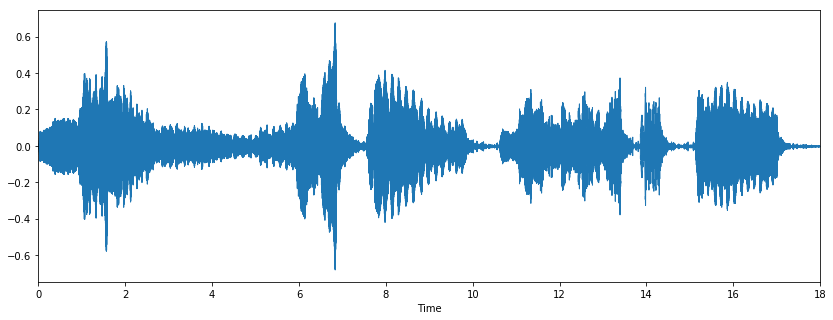

In [17]:
plt.figure(figsize = (14,5))
librosa.display.waveplot(x, sr=sr)

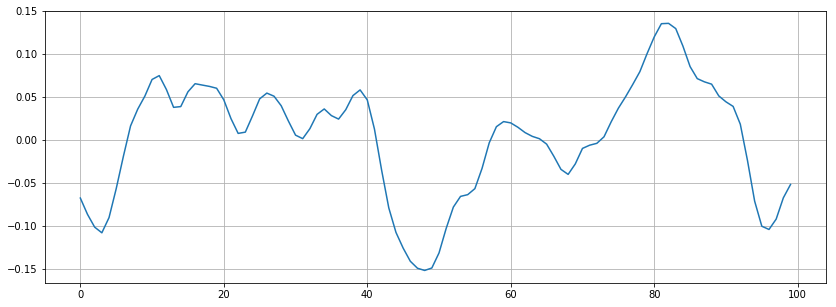

In [18]:
n0 = 9000
n1 = 9100
plt.figure(figsize = (14,5))
plt.plot(x[n0:n1])
plt.grid()

zero crossing count = 6

In [19]:
zero_crossings = librosa.zero_crossings(x[n0:n1], pad=False)
zero_crossings.shape

(100,)

In [20]:
zero_crossings

array([False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False])

In [21]:
print(sum(zero_crossings))

6


##### 2) Spectral Centroid
- where the "centre of mass" for a sound is located.
- weighted mean of frequencies present in the sound.
- Metal songs will have more frequencies towards the end, while Blues song will be same throughout its length.
- spectral centroid for blues song will be somewhere near the middle of it spectrum.
- will be towards the end for a metal song.

In [22]:
spectral_centroids = librosa.feature.spectral_centroid(x, sr=sr)[0]
spectral_centroids.shape

(775,)

In [7]:
import sklearn

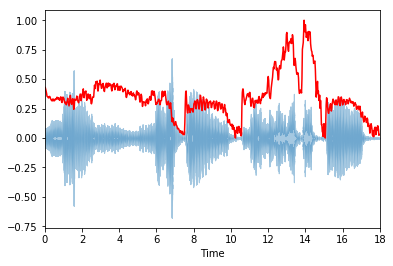

In [25]:
#computing time variable for visualization
frames = range(len(spectral_centroids))
t = librosa.frames_to_time(frames)

#normalising the spectral centroid for visualization
def normalize(x, axis=0):
    return sklearn.preprocessing.minmax_scale(x, axis=axis)

#Plotting the spectral centroid along the waveform
librosa.display.waveplot(x, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_centroids), color='r')

There is a rise in the spectral centroid towards the end.

#### 3) Spectral rolloff
- measure of shape of signal.

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import librosa.display

NameError: name 'normalize' is not defined

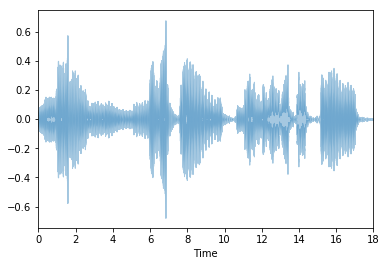

In [11]:
spectral_centroids = librosa.feature.spectral_centroid(x, sr=sr)[0]
frames = range(len(spectral_centroids))
t = librosa.frames_to_time(frames)

spectral_rolloff = librosa.feature.spectral_rolloff(x+0.01, sr=sr)[0]
librosa.display.waveplot(x, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_rolloff), color='r')
plt.grid()

#### 4) MFCC - Mel frequency Cepstral coefficients

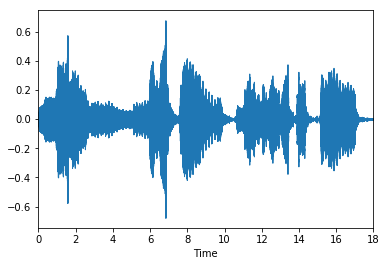

In [12]:
x, sr= librosa.load('Violin.wav')
librosa.display.waveplot(x, sr=sr)

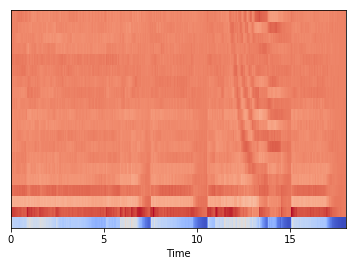

In [13]:
mfccs = librosa.feature.mfcc(x, sr=sr)
librosa.display.specshow(mfccs, sr=sr, x_axis='time')

#### Feature scaling

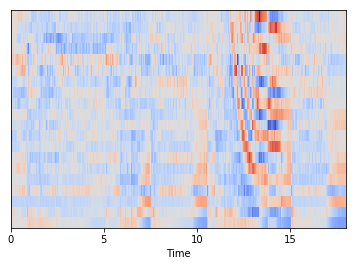

In [14]:
mfccs = sklearn.preprocessing.scale(mfccs, axis=1)
librosa.display.specshow(mfccs, sr=sr, x_axis='time')

### Chroma frquencies

In [17]:
import matplotlib.pyplot as plt

In [18]:
hop_length = 512
chromagram = librosa.feature.chroma_stft(x, sr=sr, hop_length=hop_length)
plt.figure(figsize(15,5))
librosa.load.specshow(chormagram, x_axis='time', y_axis='chroma', hop_length=hop_length, cmap='coolwarm')

NameError: name 'figsize' is not defined